<a href="https://colab.research.google.com/github/flohmannjr/Alcohol_and_Life_Expectancy/blob/main/Alcohol_and_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alcohol and Life Expectancy

Kaggle source: https://www.kaggle.com/datasets/thedevastator/relationship-between-alcohol-consumption-and-lif

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Config

In [2]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

plt.style.use('seaborn-darkgrid')

SEED = 2008193

# Data

In [3]:
df_drinks  = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/Alcohol_and_Life_Expectancy/main/drinks.csv')
df_lifeexp = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/Alcohol_and_Life_Expectancy/main/lifeexpectancy-verbose.csv')

In [4]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 193 non-null    int64  
 3   spirit_servings               193 non-null    int64  
 4   wine_servings                 193 non-null    int64  
 5   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 9.2+ KB


| **Column name**              | **Description**                                                  |
|------------------------------|------------------------------------------------------------------|
| country                      | Name of the country.                                             |
| beer_servings                | Number of beer servings per person in the country.               |
| spirit_servings              | Number of spirit servings per person in the country.             |
| wine_servings                | Number of wine servings per person in the country.               |
| total_litres_of_pure_alcohol | Total litres of pure alcohol consumed per person in the country. |

In [5]:
df_lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          6408 non-null   int64  
 1   GhoCode                        6408 non-null   object 
 2   GhoDisplay                     6408 non-null   object 
 3   PublishStateCode               6408 non-null   object 
 4   PublishStateDisplay            6408 non-null   object 
 5   YearCode                       6408 non-null   int64  
 6   YearDisplay                    6408 non-null   int64  
 7   RegionCode                     6408 non-null   object 
 8   RegionDisplay                  6408 non-null   object 
 9   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 10  WorldBankIncomeGroupDisplay    5244 non-null   object 
 11  CountryCode                    6408 non-null   object 
 12  CountryDisplay                 6408 non-null   o

| **Column name**               | **Description**                                 |
|-------------------------------|-------------------------------------------------|
| GhoCode                       | Global Health Observatory code                  |
| GhoDisplay                    | Global Health Observatory display name          |
| PublishStateCode              | Publish state code                              |
| PublishStateDisplay           | Publish state display name                      |
| YearCode                      | Year code                                       |
| YearDisplay                   | Year display name                               |
| RegionCode                    | Region code                                     |
| RegionDisplay                 | Region display name                             |
| WorldBankIncomeGroupGroupCode | World Bank Income Group Group Code              |
| WorldBankIncomeGroupDisplay   | World Bank Income Group Display Name            |
| CountryCode                   | Country code                                    |
| CountryDisplay                | Country display name                            |
| SexCode                       | Sex code                                        |
| SexDisplay                    | Sex display name                                |
| DisplayValue                  | Display value                                   |
| Numeric                       | Numeric value                                   |

## Countries

In [6]:
# New df_lifeexp column with equivalent country names from df_drinks.

df_lifeexp['Country'] = df_lifeexp['CountryDisplay']

df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Antigua and Barbuda',                                  ['Country']] = 'Antigua & Barbuda'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Bolivia (Plurinational State of)',                     ['Country']] = 'Bolivia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Bosnia and Herzegovina',                               ['Country']] = 'Bosnia-Herzegovina'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Brunei Darussalam',                                    ['Country']] = 'Brunei'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == "Côte d'Ivoire",                                        ['Country']] = "Cote d'Ivoire"
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == "Democratic People's Republic of Korea",                ['Country']] = 'North Korea'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Democratic Republic of the Congo',                     ['Country']] = 'DR Congo'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Guinea_Bissau',                                        ['Country']] = 'Guinea-Bissau'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Iran (Islamic Republic of)',                           ['Country']] = 'Iran'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == "Lao People's Democratic Republic",                     ['Country']] = 'Laos'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Micronesia (Federated States of)',                     ['Country']] = 'Micronesia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Republic of Korea',                                    ['Country']] = 'South Korea'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Republic of Moldova',                                  ['Country']] = 'Moldova'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Saint Kitts and Nevis',                                ['Country']] = 'St. Kitts & Nevis'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Saint Lucia',                                          ['Country']] = 'St. Lucia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Saint Vincent and the Grenadines',                     ['Country']] = 'St. Vincent & the Grenadines'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Sao Tome and Principe',                                ['Country']] = 'Sao Tome & Principe'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Syrian Arab Republic',                                 ['Country']] = 'Syria'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'The former Yugoslav republic of Macedonia',            ['Country']] = 'Macedonia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Timor_Leste',                                          ['Country']] = 'Timor-Leste'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Trinidad and Tobago',                                  ['Country']] = 'Trinidad & Tobago'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'United Kingdom of Great Britain and Northern Ireland', ['Country']] = 'United Kingdom'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'United Republic of Tanzania',                          ['Country']] = 'Tanzania'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'United States of America',                             ['Country']] = 'USA'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Venezuela (Bolivarian Republic of)',                   ['Country']] = 'Venezuela'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Viet Nam',                                             ['Country']] = 'Vietnam'

In [7]:
# Drop 'South Sudan' from 'Africa'

df_lifeexp.drop(df_lifeexp[(df_lifeexp['Country'] == 'South Sudan') &
                           (df_lifeexp['RegionCode'] == 'AFR')].index, inplace=True)

In [8]:
# Countries in df_drinks but not in df_lifeexp

df_drinks['country'][~df_drinks['country'].isin(df_lifeexp['Country'])]

Series([], Name: country, dtype: object)

In [9]:
# Countries in df_lifeexp but not in df_drinks

df_lifeexp['Country'][~df_lifeexp['Country'].isin(df_drinks['country'])].unique()

array(['South Sudan'], dtype=object)

## World Bank Income Groups

In [10]:
for i, d in df_lifeexp[df_lifeexp['WorldBankIncomeGroupGroupCode'].isna()].iterrows():
    df_lifeexp.loc[df_lifeexp['index'] == i, 'WorldBankIncomeGroupGroupCode'] = df_lifeexp['WorldBankIncomeGroupGroupCode'][df_lifeexp['Country'] == d['Country']].value_counts().idxmax()
    df_lifeexp.loc[df_lifeexp['index'] == i, 'WorldBankIncomeGroupDisplay'] = df_lifeexp['WorldBankIncomeGroupDisplay'][df_lifeexp['Country'] == d['Country']].value_counts().idxmax()

## Counts

In [11]:
df_lifeexp[['GhoCode', 'GhoDisplay', 'YearDisplay']].value_counts().sort_index()

GhoCode        GhoDisplay                                       YearDisplay
WHOSIS_000001  Life expectancy at birth (years)                 1990           582
                                                                2000           582
                                                                2012           582
                                                                2013           579
WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)  2000           585
                                                                2012           585
                                                                2013           582
WHOSIS_000015  Life expectancy at age 60 (years)                1990           582
                                                                2000           582
                                                                2012           582
                                                                2013           579
dtype: int6

In [12]:
df_lifeexp['RegionDisplay'].value_counts() / 33

Europe                   53.0
Africa                   46.0
Americas                 35.0
Western Pacific          27.0
Eastern Mediterranean    22.0
South_East Asia          11.0
Name: RegionDisplay, dtype: float64

In [13]:
df_lifeexp[['WorldBankIncomeGroupGroupCode', 'WorldBankIncomeGroupDisplay']].value_counts(dropna=False)

WorldBankIncomeGroupGroupCode  WorldBankIncomeGroupDisplay
WB_LMI                         Lower_middle_income            1758
WB_HI                          High_income                    1683
WB_UMI                         Upper_middle_income            1485
WB_LI                          Low_income                     1476
dtype: int64

In [14]:
df_lifeexp[['SexCode', 'SexDisplay']].value_counts()

SexCode  SexDisplay
BTSX     Both sexes    2134
FMLE     Female        2134
MLE      Male          2134
dtype: int64

In [15]:
# display_columns = ['GhoDisplay', 'YearDisplay', 'RegionDisplay', 'Country', 'WorldBankIncomeGroupDisplay', 'SexDisplay', 'Numeric']

# df_lifeexp[display_columns][(df_lifeexp['Country'] == 'Brazil') &
#                             (df_lifeexp['SexCode'] == 'BTSX')]

# Life Expectancy Analisys

In [16]:
df = df_lifeexp[['GhoDisplay', 'YearDisplay', 'RegionDisplay', 'SexDisplay', 'Numeric']].groupby(by=['GhoDisplay', 'YearDisplay', 'RegionDisplay', 'SexDisplay']).mean().sort_index()

In [17]:
df

Numeric
GhoDisplay                                      YearDisplay RegionDisplay   SexDisplay           
Healthy life expectancy (HALE) at birth (years) 2000        Africa          Both sexes  44.956522
                                                                            Female      45.832609
                                                                            Male        44.117391
                                                            Americas        Both sexes  62.682857
                                                                            Female      64.660000
...                                                                                           ...
Life expectancy at birth (years)                2013        South_East Asia Female      72.482781
                                                                            Male        68.512405
                                                            Western Pacific Both sexes  73.533591
                                                                            Female      75.968239
                                                                            Male        71.229499

[198 rows x 1 columns]

In [38]:
for gho, _ in df.groupby(level=0):

    years = df.loc[(gho), :]
    # print(gho)
    # print(years)
    # break

    for year, _ in years.groupby(level=0):

        regions = df.loc[(gho, year), :]
        # print(year)
        # print(regions)
        # break

        for region, _ in regions.groupby(level=0):

            sexes = df.loc[(gho, year, region), :]
            # print(region)
            # print(sexes)
            # break

            # for sex, _ in sexes.groupby(level=0):

            #     expectancy = df.loc[(gho, year, region, sex)]
            #     # print(expectancy)
            #     break

            break

        break

    break


In [40]:
# expectancy[0]

44.95652173913044

In [41]:
sexes

,Numeric
SexDisplay,
Both sexes,44.956522
Female,45.832609
Male,44.117391


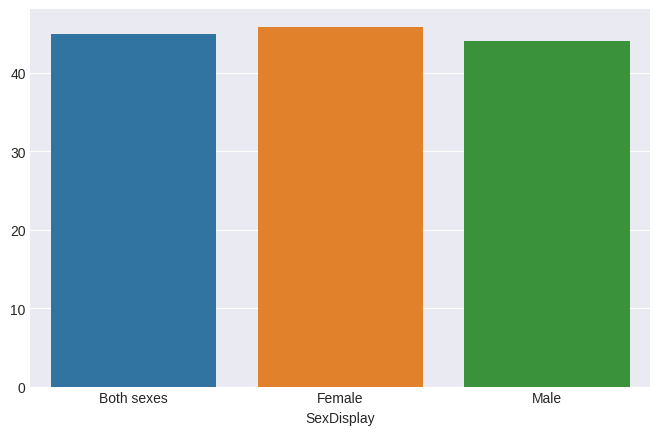

In [43]:
# metrica = pd.DataFrame(metrica).T

sns.barplot(data=sexes.T);

# plt.title('')
# plt.xlabel('Modelo')
# plt.ylabel('')

# plt.show()